In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.keras import models,layers,optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
import re
import re
import nltk

## Self-Test Kits

In [4]:
df=pd.read_csv('Amazon_scrap_data_3')

In [5]:
df.head()

,Unnamed: 0,Customer_Name,Customer_Rating,Review_Date,Customer_Review
0,0,Nikunj Joshi,5.0 out of 5 stars,Reviewed in India on 29 December 2021,\n\n I got a false positive. Scared me to bit...
1,1,Vasu,5.0 out of 5 stars,Reviewed in India on 16 February 2022,\n\n\n\n\n The media could ...
2,2,Amazon Customer,1.0 out of 5 stars,Reviewed in India on 7 January 2022,\n\n The instructions manual is VERY SIMPLE t...
3,3,Shaurya G.,1.0 out of 5 stars,Reviewed in India on 6 February 2022,\n\n CoviFind home test is a relief in such d...
4,4,Manan Shah,1.0 out of 5 stars,Reviewed in India on 24 July 2021,\n\n This kit is too dangerous and ambiguous....


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(256, 4)

In [10]:
#data cleaning
clean=[]
for i in df['Customer_Review']:
    clean.append(i)


In [11]:

clean[:]=[ i.lstrip('\n') for i in clean]

In [12]:
clean[:]=[ i.rstrip('\n') for i in clean]

In [13]:
clean2=[]
for i in clean:
    clean2.append(i.strip('The media could not be loaded.\n                \n\n\n\n\n  \xa0'))

In [14]:
df['Customer_Review']=clean2

In [15]:
len(df['Customer_Review'])

256

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [18]:
corpus3=[]
for i in df['Customer_Review']:
    corpus3.append(remove_special_characters(i))

In [21]:
from textblob import TextBlob

In [22]:
x3=pd.Series(corpus3)

In [23]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity
df['Sentiment_polarity']=x3.apply(find_pol)
df.head()

,Customer_Name,Customer_Rating,Review_Date,Customer_Review,Sentiment_polarity
0,Nikunj Joshi,5.0 out of 5 stars,Reviewed in India on 29 December 2021,"I got a false positive. Scared me to bits, but...",0.003030
1,Vasu,5.0 out of 5 stars,Reviewed in India on 16 February 2022,quid inside the buffer tube leaked as you can ...,0.175000
2,Amazon Customer,1.0 out of 5 stars,Reviewed in India on 7 January 2022,structions manual is VERY SIMPLE to understand...,0.166667
3,Shaurya G.,1.0 out of 5 stars,Reviewed in India on 6 February 2022,CoviFind home test is a relief in such difficu...,0.079018
4,Manan Shah,1.0 out of 5 stars,Reviewed in India on 24 July 2021,s kit is too dangerous and ambiguous.It gave m...,-0.141667


C:\Users\chera\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_polarity', ylabel='Density'>

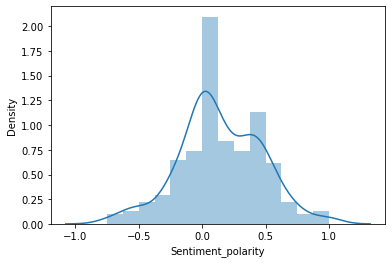

In [24]:
sns.distplot(df['Sentiment_polarity'])

<AxesSubplot:xlabel='Customer_Rating', ylabel='Sentiment_polarity'>

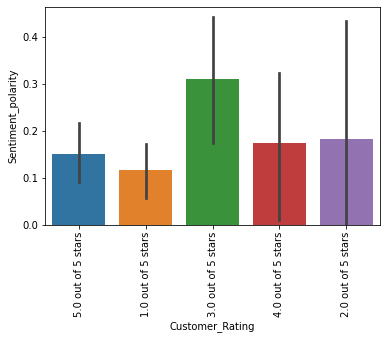

In [25]:
#infrence (11)
plt.xticks(rotation='vertical')
sns.barplot(x='Customer_Rating',y='Sentiment_polarity',data=df)

In [26]:
df[df['Sentiment_polarity']==1]

,Customer_Name,Customer_Rating,Review_Date,Customer_Review,Sentiment_polarity
192,Amazon Customer,4.0 out of 5 stars,Reviewed in India on 7 August 2021,G,1.0
194,Deepanshu Rao,5.0 out of 5 stars,Reviewed in India on 24 July 2021,Amazing Product for Detecting Covid 19 at H,1.0
234,Vasu,1.0 out of 5 stars,Reviewed in India on 19 January 2022,It's not useful to test current covid strain W...,1.0


## PPE 

In [27]:
df1=pd.read_csv('PPE KIT DATA.csv')

In [28]:
df1.head()

,Customer Name,Date,Ratings,Rewiew title,Review content
0,Hemu123,Reviewed in India on 2 July 2020,5.0 out of 5 stars,"Good quality,Good fitting and size. protect ag...","Every item supplied is worth the price, be it ..."
1,Anil kumar,Reviewed in India on 12 August 2020,3.0 out of 5 stars,This PPE Kit is not suitable for people who ha...,This PPE Kit is not suitable for people who ha...
2,Dr Gargi Mitra Sengupta,Reviewed in India on 17 September 2020,3.0 out of 5 stars,Dalucci PPE,Good PPE..tough but comfortable. The elastic i...
3,Pratik maheshwari,Reviewed in India on 28 July 2020,1.0 out of 5 stars,Delivering defaulted product.,Got the defaulted product. The chain was not w...
4,Customer,Reviewed in India on 9 October 2020,1.0 out of 5 stars,Absolute waste of money,Ordered two. Received two different kits. Onl...


We will be doing sentiment analysis to see how good and how useful these are for People of India.
And also use this in our Main Inference to connect with rise in covid cases and how it affects supply and demand during peak times

In [29]:
#data cleaning

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df1['Review content'].count()

433

In [32]:
corups=[]
for i in range(0,433):
    review=re.sub('[^a-zA-Z]',' ',df1['Review content'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corups.append(review)

In [33]:
#data  transformation

In [34]:
from textblob import TextBlob

In [35]:
x=pd.Series(corups)

In [36]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity
df1['Sentiment_polarity']=x.apply(find_pol)
df1.head()

,Customer Name,Date,Ratings,Rewiew title,Review content,Sentiment_polarity
0,Hemu123,Reviewed in India on 2 July 2020,5.0 out of 5 stars,"Good quality,Good fitting and size. protect ag...","Every item supplied is worth the price, be it ...",0.470000
1,Anil kumar,Reviewed in India on 12 August 2020,3.0 out of 5 stars,This PPE Kit is not suitable for people who ha...,This PPE Kit is not suitable for people who ha...,-0.400000
2,Dr Gargi Mitra Sengupta,Reviewed in India on 17 September 2020,3.0 out of 5 stars,Dalucci PPE,Good PPE..tough but comfortable. The elastic i...,0.119753
3,Pratik maheshwari,Reviewed in India on 28 July 2020,1.0 out of 5 stars,Delivering defaulted product.,Got the defaulted product. The chain was not w...,-0.200000
4,Customer,Reviewed in India on 9 October 2020,1.0 out of 5 stars,Absolute waste of money,Ordered two. Received two different kits. Onl...,0.000000


C:\Users\chera\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_polarity', ylabel='Density'>

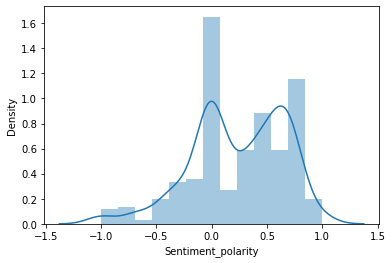

In [37]:
sns.distplot(df1['Sentiment_polarity'])

In [38]:
df1['Sentiment_polarity'].describe()

count    433.000000
mean       0.233286
std        0.421832
min       -1.000000
25%        0.000000
50%        0.266667
75%        0.600000
max        1.000000
Name: Sentiment_polarity, dtype: float64

<AxesSubplot:xlabel='Ratings', ylabel='Sentiment_polarity'>

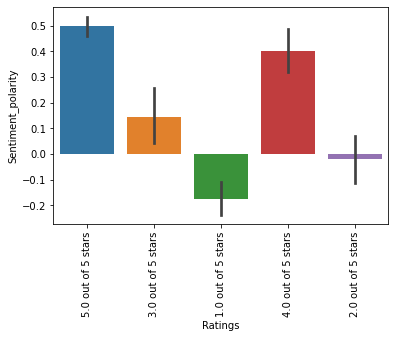

In [39]:
#infrence (12)
plt.xticks(rotation='vertical')
sns.barplot(x='Ratings',y='Sentiment_polarity',data=df1)

In [40]:
most_negative_sentmient = df1[df1.Sentiment_polarity==-1]

In [41]:
most_negative_sentmient


,Customer Name,Date,Ratings,Rewiew title,Review content,Sentiment_polarity
44,RAHUL TEXTILES,Reviewed in India on 19 June 2020,1.0 out of 5 stars,"Worst product ,it’s a daylight robbery, encash...","Worst product , does not meet the minimum qua...",-1.0
113,Buyer,Reviewed in India on 14 July 2020,1.0 out of 5 stars,Worst 👎,Worst product! Dirty product delivered! Torn p...,-1.0
136,Rahul Mishra,Reviewed in India on 17 July 2020,1.0 out of 5 stars,This product does not deserve any stars.,The chain went off when I tried to wear it. T...,-1.0
183,Product is good but colour is different. I ord...,Reviewed in India on 14 August 2020,1.0 out of 5 stars,Worst product,Worst product.. making quality is zero,-1.0
225,suman saurabh ghosh,Reviewed in India on 8 August 2020,1.0 out of 5 stars,Worst ppe kit,Worst product..made of plastic. Suffocating..,-1.0
300,Kamal Deep,Reviewed in India on 8 September 2020,1.0 out of 5 stars,Good product,Worst product .Worst material .Only the gown w...,-1.0
346,Kaushik Sett,Reviewed in India on 13 May 2021,1.0 out of 5 stars,Very bad product,"Worst quality product, looks like used one wit...",-1.0
353,Narasimhalu,Reviewed in India on 20 May 2021,1.0 out of 5 stars,Bad quality.,Worst quality don't buy and waste your money,-1.0


In [42]:
most_postive_sentmient = df1[df1.Sentiment_polarity==1]

In [43]:
most_postive_sentmient

,Customer Name,Date,Ratings,Rewiew title,Review content,Sentiment_polarity
59,NIKHIL,Reviewed in India on 14 July 2020,5.0 out of 5 stars,Amazing Quality,Best Product Amazing QualityEfficient rate I'm...,1.0
173,Shivangee Mishra,Reviewed in India on 30 August 2020,5.0 out of 5 stars,Value for money,Perfect.Value for Money.I used it during my fl...,1.0
231,Kamal singh,Reviewed in India on 14 June 2020,5.0 out of 5 stars,best product to fight against corona,Amazing kit and everything is so perfect and c...,1.0
273,Rahul Pareek,Reviewed in India on 21 January 2022,5.0 out of 5 stars,Best,Best ppe kit. Must buy product👍👍,1.0
334,Pavan Kumar Kashyap,Reviewed in India on 1 June 2021,5.0 out of 5 stars,"It's a marvelous product ,easy to use and safe...",Comfortable to wear...best product,1.0
429,Sumeet Bhasin,Reviewed in India on 19 May 2021,4.0 out of 5 stars,Great product,Superb quality for suit however head shield is...,1.0
432,Manish Mamidwar,Reviewed in India on 6 November 2020,5.0 out of 5 stars,Perfect safety kit,\nQuality of PPE kit perfect and complete set ...,1.0
